In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df = pd.read_excel('Sample3YNew.xlsx')

In [59]:
print(df)

    Week Start     Bookings
0   2021-08-01   129.808103
1   2021-08-08   122.962071
2   2021-08-15   153.664518
3   2021-08-22   234.772937
4   2021-08-29   214.594944
..         ...          ...
151 2024-06-23   470.627747
152 2024-06-30   255.512305
153 2024-07-07   362.050456
154 2024-07-14   883.347637
155 2024-07-21  2010.113923

[156 rows x 2 columns]


In [60]:
df.head()

,Week Start,Bookings
0,2021-08-01,129.808103
1,2021-08-08,122.962071
2,2021-08-15,153.664518
3,2021-08-22,234.772937
4,2021-08-29,214.594944


In [61]:
df.set_index('Week Start',inplace=True)

In [62]:
df.head()

,Bookings
Week Start,
2021-08-01,129.808103
2021-08-08,122.962071
2021-08-15,153.664518
2021-08-22,234.772937
2021-08-29,214.594944


In [63]:
df.describe()

,Bookings
count,156.000000
mean,300.856753
std,289.476666
min,72.686246
25%,163.728986
50%,211.040873
75%,292.542353
max,2010.113923


<Axes: xlabel='Week Start'>

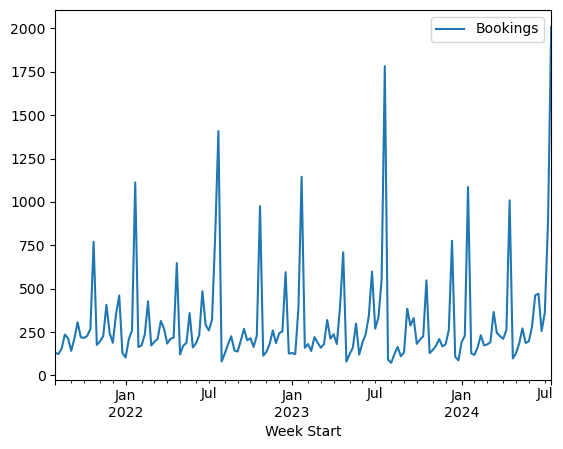

In [64]:
#Step 2. Visualize the Data
df.plot()

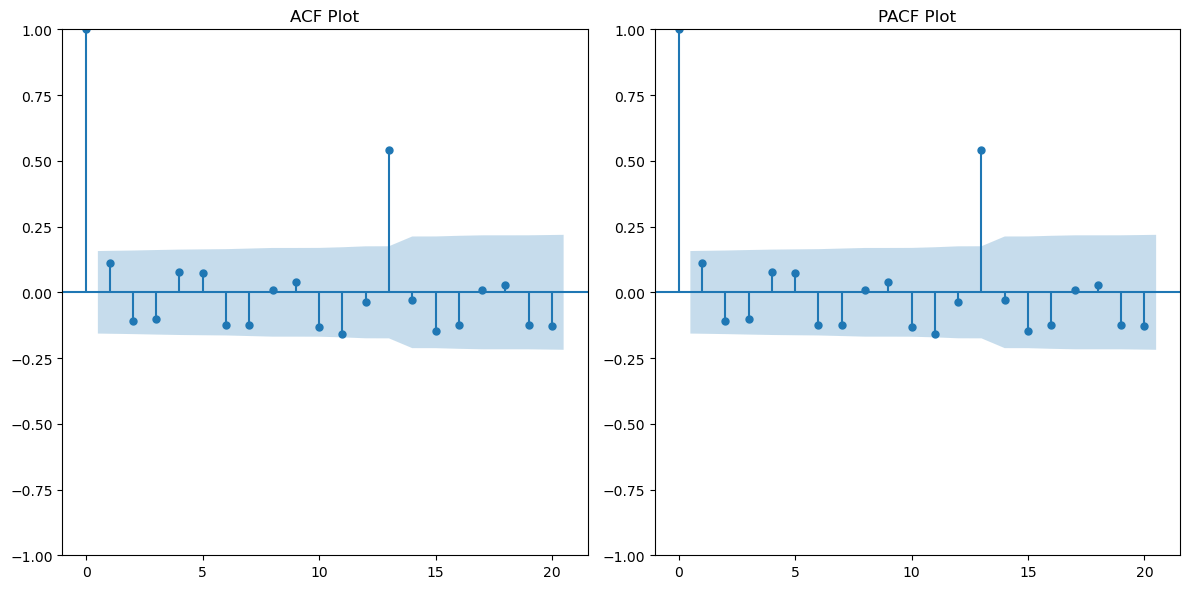

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF plot- Autocorrelation function to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('ACF Plot')

#PACF plot-Partial Autocorrelation to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.subplot(1,2,2)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [66]:
###Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [67]:
#Null Hypo: It is non stationary
#Alternate Hypo: It is stationary
#95% CI considered

def adfuller_test(Bookings):
    result=adfuller(Bookings)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=.05:
        print("Strong evidence against null hypo")
    else:
        print("Weak evidence against null hypo")

In [68]:
adfuller_test(df['Bookings'])

ADF Test Statistic:-2.3077418590295036
p-value:0.16948322418583717
#Lags Used:13
Number of Observations Used:142
Weak evidence against null hypo


In [69]:
#### If it is non stationary we have to make it Stationary
### Differencing
df['Seasonal First Difference']=df['Bookings']-df['Bookings'].shift(13)

In [70]:
df.head(15)

,Bookings,Seasonal First Difference
Week Start,,
2021-08-01,129.808103,NaN
2021-08-08,122.962071,NaN
2021-08-15,153.664518,NaN
2021-08-22,234.772937,NaN
2021-08-29,214.594944,NaN
2021-09-05,141.077460,NaN
2021-09-12,212.493876,NaN
2021-09-19,305.957476,NaN
2021-09-26,219.117424,NaN


In [71]:
### Again performing adfuller_test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic:-3.8394071447095457
p-value:0.0025289066544253542
#Lags Used:13
Number of Observations Used:129
Strong evidence against null hypo


<Axes: xlabel='Week Start'>

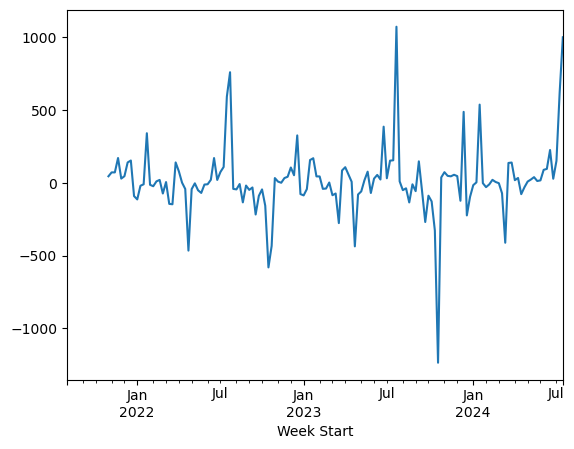

In [72]:
### Plotting the graph
df['Seasonal First Difference'].plot()

<Axes: xlabel='Week Start'>

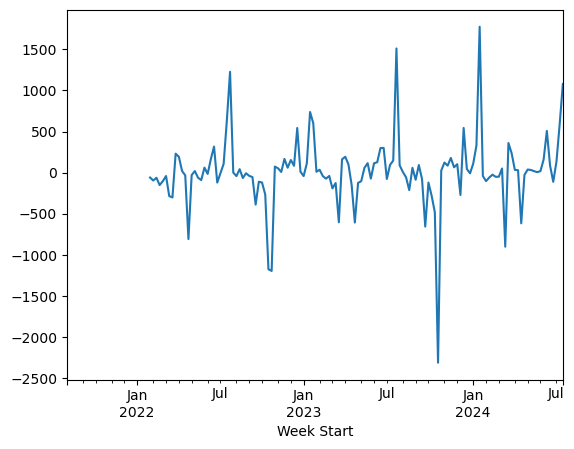

In [73]:
df['Seasonal Second Difference']=df['Seasonal First Difference']-df['Seasonal First Difference'].shift(13)
df['Seasonal Second Difference'].plot()

In [74]:
### For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Bookings'],order=(1,2,1),seasonal_order=(1,2,1,13))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [75]:
results=model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.11849D+00    |proj g|=  4.75959D-02

At iterate    5    f=  6.10043D+00    |proj g|=  3.90548D-03

At iterate   10    f=  6.09957D+00    |proj g|=  2.32506D-03

At iterate   15    f=  6.08197D+00    |proj g|=  3.91370D-02

At iterate   20    f=  5.91889D+00    |proj g|=  7.56853D-02

At iterate   25    f=  5.90268D+00    |proj g|=  2.15133D-03

At iterate   30    f=  5.88016D+00    |proj g|=  2.03768D-01

At iterate   35    f=  5.67247D+00    |proj g|=  4.00749D-02

At iterate   40    f=  5.65470D+00    |proj g|=  2.41860D-03

At iterate   45    f=  5.65320D+00    |proj g|=  1.60777D-03

At iterate   50    f=  5.65306D+00    |proj g|=  4.12917D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Week Start'>

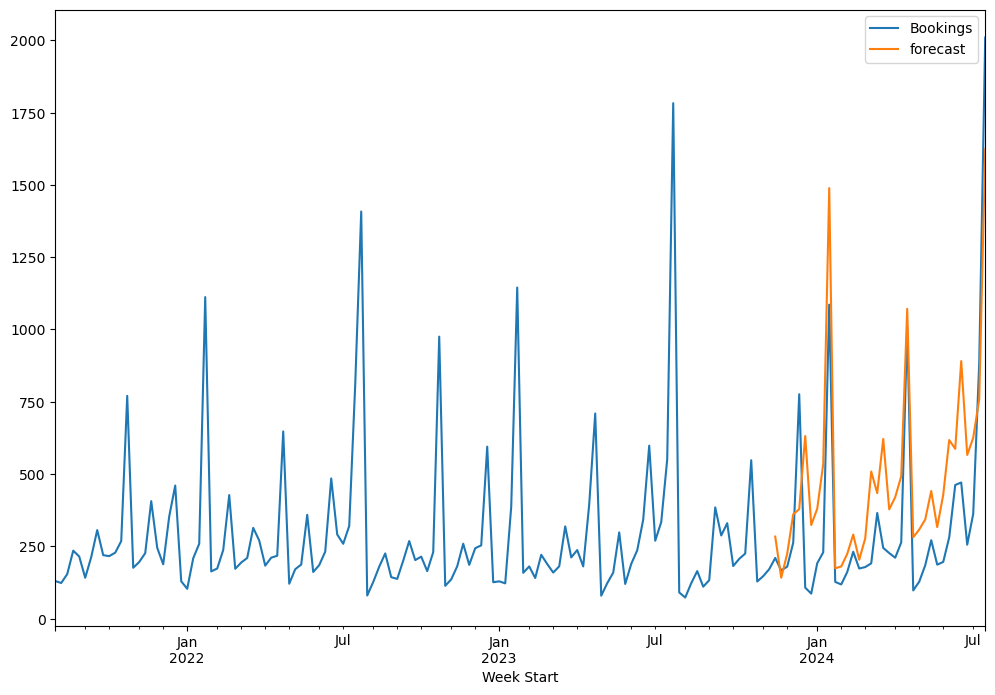

In [76]:
df['forecast']=results.predict(start=120, end = 156, dynamic=True) # testing the model performance with sample input
df[['Bookings','forecast']].plot(figsize=(12,8))

In [77]:
### Predicting future forecast
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(weeks=x)for x in range(0,26)] # Creating future weeks- 26 weeks placeholder

In [78]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataset_df.index.name = 'Week Start'

In [80]:
future_dataset_df.head()

,Bookings,Seasonal First Difference,Seasonal Second Difference,forecast
Week Start,,,,
2024-07-28,NaN,NaN,NaN,NaN
2024-08-04,NaN,NaN,NaN,NaN
2024-08-11,NaN,NaN,NaN,NaN
2024-08-18,NaN,NaN,NaN,NaN
2024-08-25,NaN,NaN,NaN,NaN


In [81]:
# fill NaN values with float
future_dataset_df['Bookings']= future_dataset_df['Bookings'].fillna(0.0)
future_dataset_df['Seasonal First Difference']= future_dataset_df['Seasonal First Difference'].fillna(0.0)
future_dataset_df['forecast']= future_dataset_df['forecast'].fillna(0.0)
future_dataset_df.head()

,Bookings,Seasonal First Difference,Seasonal Second Difference,forecast
Week Start,,,,
2024-07-28,0.0,0.0,NaN,0.0
2024-08-04,0.0,0.0,NaN,0.0
2024-08-11,0.0,0.0,NaN,0.0
2024-08-18,0.0,0.0,NaN,0.0
2024-08-25,0.0,0.0,NaN,0.0


In [82]:
# fill NaN values with float for original dataframe
df['Bookings']= df['Bookings'].fillna(0.0)
df['Seasonal First Difference']= df['Seasonal First Difference'].fillna(0.0)
df['forecast']= df['forecast'].fillna(0.0)
df.head()

,Bookings,Seasonal First Difference,Seasonal Second Difference,forecast
Week Start,,,,
2021-08-01,129.808103,0.0,NaN,0.0
2021-08-08,122.962071,0.0,NaN,0.0
2021-08-15,153.664518,0.0,NaN,0.0
2021-08-22,234.772937,0.0,NaN,0.0
2021-08-29,214.594944,0.0,NaN,0.0


In [83]:
future_df=pd.concat([df,future_dataset_df])

/var/folders/qg/9qnm2g51701gxcxzzwr1q97c0000gn/T/ipykernel_92885/674726799.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_dataset_df])


<Axes: xlabel='Week Start'>

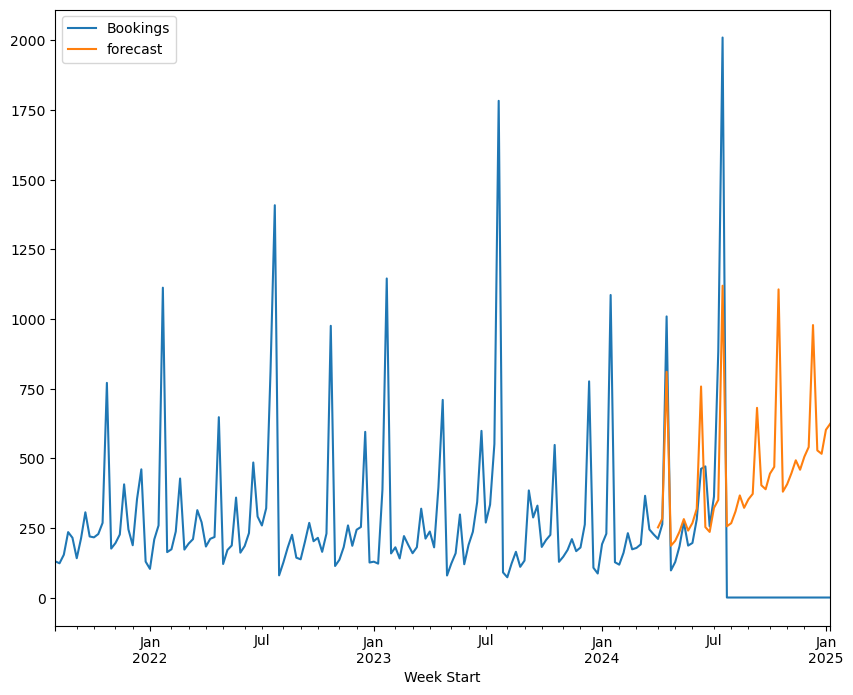

In [84]:
future_df['forecast']=results.predict(start=140, end=180, dynamic=True)
future_df[['Bookings','forecast']].plot(figsize=(10,8))

In [85]:
future_df1=future_df[future_df['forecast'].notna()]
# check the forecast values along with the bookings for the last weeks
print(future_df1)

               Bookings  Seasonal First Difference  \
Week Start                                           
2024-04-07   210.389104                  19.145915   
2024-04-14   263.200429                  34.220824   
2024-04-21  1009.011981                 -76.905784   
2024-04-28    97.261724                 -29.449396   
2024-05-05   127.444699                   9.525840   
2024-05-12   184.174379                  23.355634   
2024-05-19   270.958808                  39.920855   
2024-05-26   186.469292                  13.407451   
2024-06-02   195.795595                  17.757774   
2024-06-09   280.900803                  89.980444   
2024-06-16   461.896416                  96.731837   
2024-06-23   470.627747                 226.311910   
2024-06-30   255.512305                  29.082576   
2024-07-07   362.050456                 151.661352   
2024-07-14   883.347637                 620.147208   
2024-07-21  2010.113923                1001.101942   
2024-07-28     0.000000     

In [34]:
# Save the new dataframe in the workbook
from openpyxl import Workbook  # openpyxl helps to read and write data in excel
future_df1_selected_cols=future_df1[['Bookings','forecast']]

# Remove the time part from the index by formatting it as date only
future_df1_selected_cols.index = future_df1_selected_cols.index.strftime('%Y-%m-%d')

future_df1_selected_cols.to_excel('output3Y.xlsx', index=True, engine='openpyxl')
print('Yes the file is downloading...')

Yes the file is downloading...


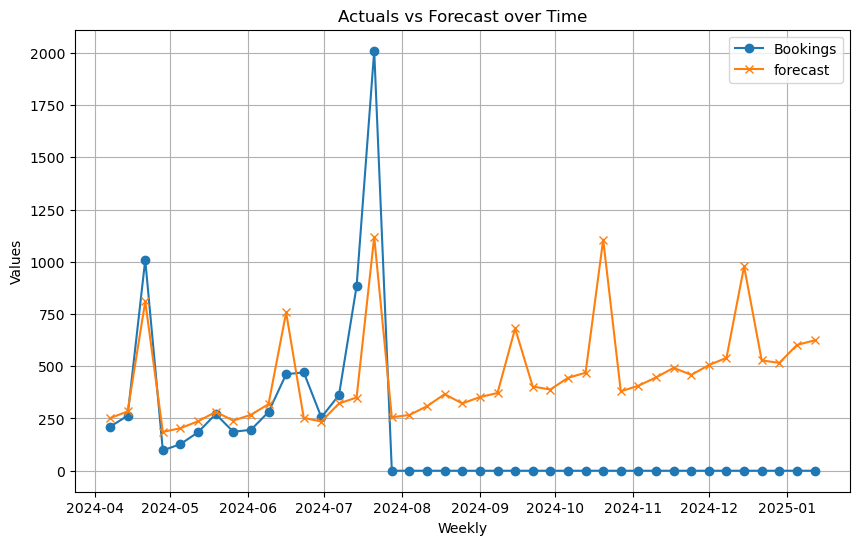

In [86]:
# Plot the Actuals vs Forecast

plt.figure(figsize=(10, 6))
plt.plot(future_df1.index, future_df1['Bookings'], label='Bookings', marker='o')
plt.plot(future_df1.index, future_df1['forecast'], label='forecast', marker='x')

# Customize the graph
plt.title('Actuals vs Forecast over Time')
plt.xlabel('Weekly')
plt.ylabel('Values')
plt.grid(True)
plt.legend(loc='upper right')

# Save the plot to a PNG file. Needs to save first before plotting the graph
plt.savefig('actuals_forecast_2022_2024.png')

# Show the plot 
plt.show()

In [87]:
import openpyxl
from openpyxl.drawing.image import Image

# Load the workbook and select the active worksheet
wb = openpyxl.load_workbook('output3Y.xlsx')
ws = wb.active #worksheet activated 

# Add the saved image to the worksheet
img = Image('actuals_forecast_2022_2024.png')
ws.add_image(img, 'G5')  # Insert the image starting from cell G5

# Save the updated Excel file
wb.save('actuals_forecast_2022_2024.xlsx')

In [88]:
future_df1_selected_cols.describe()

,Bookings,forecast
count,41.000000,41.000000
mean,177.296471,447.097135
std,373.495896,230.848784
min,0.000000,185.851579
25%,0.000000,281.474771
50%,0.000000,379.929618
75%,210.389104,515.920813
max,2010.113923,1119.216993


In [90]:
### Draw Line chart graph in excel and save it.

import xlsxwriter

# Create an Excel writer object and use xlsxwriter as the engine
with pd.ExcelWriter('line_chart_example.xlsx', engine='xlsxwriter') as writer:
    
    
    # Write the DataFrame to Excel
    future_df1_selected_cols.to_excel(writer, sheet_name='Sheet1', index=True)

    # Access the workbook and worksheet objects
    workbook = writer.book
    worksheet = writer.sheets['Sheet1']
    
    # Create a chart object (line chart)
    chart = workbook.add_chart({'type': 'line'})

    # Configure the first series (Actuals)
    chart.add_series({
        'name': 'Bookings',
        'categories': ['Sheet1', 1, 0, 42, 0],  # (sheet_name, start_row=1, start_col=0 always, end_row=42, end_col=0 always)
        'values': ['Sheet1', 1, 1, 42, 1],      # (sheet_name, start_row=1, start_col=1, end_row=42, end_col)
    })

    # Configure the second series (Forecast)
    chart.add_series({
        'name': 'forecast',
        'categories': ['Sheet1', 1, 0, 42, 0],  # Date column for categories
        'values': ['Sheet1', 1, 2, 42, 2],      # Forecast values (row 1 to 42, column 2)
    })

    # Add a chart title and axis labels
    chart.set_title({'name': 'Actuals vs Forecast'})
    chart.set_x_axis({'name': 'Weekly'})
    chart.set_y_axis({'name': 'Values'})
    
    # Set a fixed size for the chart (width and height in pixels)
    chart.set_size({'width': 1000, 'height': 600})  # You can adjust these values
    
    # Insert the chart into the worksheet
    worksheet.insert_chart('E2', chart)